> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset: The TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Introduction: I'll be exploring the TMDb movies dataset containing data on 10,000 movies including user ratings, genre,  budget and box office revenue. The columns in the table:


Questions for our analysis: is there a correlation between the popularity score and the production budget? Does the lead actor or director have an effect on the popularity score? which films were most popular in the last 20 years?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [25]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df_tmdb = pd.read_csv(r"C:\Users\sjohn\anaconda3\envs\my_env\Investigate A Dataset\tmdb-movies.csv")
df_tmdb.head(2)
#df_tmdb.info()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Now I'm going to review the data's structure to examine the columns and the number of rows in each to note their datatypes, look for missing data and get some summary statistics. I'll be using the .info(), .shape, and .describe() methods.

In [5]:
#data structure
df_tmdb.info()
#df_tmdb.shape
#df_tmdb.release_year.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The .info function and .shape gives me lots of information. I can see the column names, the row counts in each column and their datatypes. It also gives me a breakdown on the total number of each datatype(dtypes) and now we know how many numeric columns (10) and object columns(11) are present. The .shape method returns the dimensions of the dataframe, with 10866 rows and 21 columns. <p>It is apparent that some rows have missing data in columns so that will need to be addressed before exploratory data analysis can begin. Now that I have the datatypes and column names I can examine and decide whether to drop columns that may not be useful for our analysis. The numeric datatypes also vary so some might need to be converted before we work with them. Next I will get some statistics using .describe(), .max(), and .min().<p/> 


In [28]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<p>
    There's more problems with this dataset. Note the <strong>release_date</strong> column's datatype is "object", which in Pandas is just a pointer to a string datatype. This column should be a datetime object which will allow date operations to be performed on it. I can also easily discern that some of the columns have large values with leading or trailing zeros. We'll modify the number of decimal places in the columns and remove some trailing zeros in the values. But first I will convert the release_date column to a datetime object.</p>

In [29]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

Next I will confirm the change was successful using the dtypes method.

In [30]:
df_tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

As expected, the change was successful. Now that the release_date column is a datetime object it is available for use in our analysis. Now we want to return the min() and max() values to get ranges.

In [7]:
df_tmdb.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
df_tmdb_max = df_tmdb.select_dtypes(include='number').max()
df_tmdb_min = df_tmdb.select_dtypes(include='number').min()
print("Max Value:\n","\n", df_tmdb_max, "\n")
print("Min Value:\n","\n", df_tmdb_min)

Max Value:
 
 id              4.178590e+05
popularity      3.298576e+01
budget          4.250000e+08
revenue         2.781506e+09
runtime         9.000000e+02
vote_count      9.767000e+03
vote_average    9.200000e+00
release_year    2.015000e+03
budget_adj      4.250000e+08
revenue_adj     2.827124e+09
dtype: float64 

Min Value:
 
 id                 5.000000
popularity         0.000065
budget             0.000000
revenue            0.000000
runtime            0.000000
vote_count        10.000000
vote_average       1.500000
release_year    1960.000000
budget_adj         0.000000
revenue_adj        0.000000
dtype: float64


As you can see above I have the range of values after getting the maximum and minimum numbers. This may be useful in our analysis. Next let's deal with the trailing zeros.

In [9]:
df_tmdb.info()
#df_tmdb.round(decimals=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

NOTES: NEED TO DROP id COLUMN AND CONVERT SOME COLUMNS TO EITHER INT OR FLOAT

Obtaining the number of unique values in each column might also be helpful for our analysis. Let's use the .nunique function to accomplish this.

In [10]:
#df_tmdb.nunique()
df_tmdb.shape

(10866, 21)

Now we have the total number of unique values in the columns, here for our reference if needed.

Next, let's adjust the decimal of the popularity column to two and get rid of the extra digits.

In [11]:
#df_tmdb['popularity'] = df_tmdb['popularity'].apply(lambda x: round(x, 2))
#df_tmdb.head()
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning - Removing nulls and duplicate rows

After confirming rows with null values in the previous step, I'm going to remove them using the .dropna() function below. This makes the data more consistent and suitable for our data analysis.


In [12]:
df_tmdb.dropna(inplace=True)

Next I'll confirm that the nulls have been removed using the .isnull(), .sum(), and .any() methods. This returns a Boolean value, expected to be False indicating the rows have been removed.

In [13]:
df_tmdb.isnull().sum().any()

False

In [19]:
#df_tmdb.head()
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      1992 non-null   float64
 1   budget          1992 non-null   int64  
 2   revenue         1992 non-null   int64  
 3   original_title  1992 non-null   object 
 4   cast            1992 non-null   object 
 5   director        1992 non-null   object 
 6   genres          1992 non-null   object 
 7   release_date    1992 non-null   object 
 8   vote_count      1992 non-null   int64  
 9   vote_average    1992 non-null   float64
 10  release_year    1992 non-null   int64  
 11  budget_adj      1992 non-null   float64
 12  revenue_adj     1992 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 217.9+ KB


As expected the previous statement returned False. The last step in this data cleaning operation is to confirm if any duplicate rows exist using the .duplicated() function. As before, sum() will return the total number of duplicate rows.

In [20]:
print(df_tmdb.duplicated().sum())

0


After reviewing the data further I'm going to drop some columns that are not useful for our analysis. This should make the dataframe easier to work with.

In [21]:
df_tmdb.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'runtime', 'keywords', 'production_companies'], axis=1, inplace=True)
df_tmdb.info()

KeyError: "['id' 'imdb_id' 'homepage' 'tagline' 'overview' 'runtime' 'keywords'\n 'production_companies'] not found in axis"

That's better. Now, since the 'director' column is one of our independent variables, I'm to focus my analysis on it. We'll split and explode the string values in the column which, in the case of multiple directors delimited by the "|" will return the first occurence in the string which is the most prominent director for the movie.

In [22]:
df_tmdb = df_tmdb.assign(director=df_tmdb.director.str.split("|")).explode('director')
df_tmdb.head()

,popularity,budget,revenue,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The last operation returned 0 meaning it did not find any duplicates, so this saves us the step of having to remove any. Ok, so for the purposes of this analysis we now have a clean dataset we can work with. Now we'll examine the data further to look for trends or other correlating factors.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is there a correlation between the film's production budget and the popularity score?

Let's examine the [budget_adj] column which is our independent variable in this question. I'm going to use panda's hist and plot functions and matplotlib to produce some histograms and other visualizations. First, let's see what the data looks like with a simple histogram.

<AxesSubplot:>

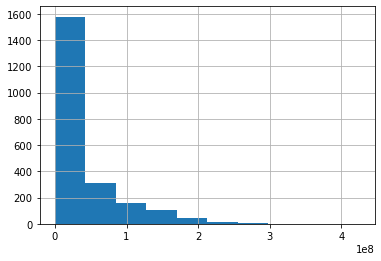

In [25]:
df_tmdb.budget_adj.hist()

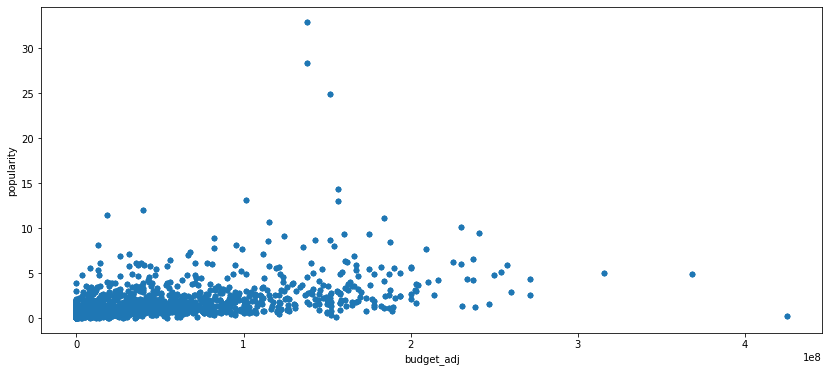

In [43]:
#df_budget = df_tmdb.budget.mean()
#df_action.hist(figsize=(12, 12));
#df_budget.plot(x='budget', y='popularity', kind="bar");
#df_tmdb.info()
df_tmdb.plot(x='budget_adj', y='popularity', kind='scatter',figsize=[14, 6]);


In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2: Is the popularity score influenced by the director of the film? 

In [96]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#df_tmdb.info()
#df_tmdb.head()
#dict = df_tmdb.groupby('director').groups
#df_tmdb.groupby('director').groups
# df_director
# df[df['director']==1].groupby('director').head(4)
#df_test = df_director.director == 'Alan Parker'
#df_director.query('vote_average > 200')
#print(dict)

df_revenue = df_tmdb.query('revenue_adj > 1400000000')

df_revenue_mean = df_tmdb.revenue_adj.mean()

df_top_directors = df_tmdb.query('df_revenue >= {}'.format(df_revenue_mean))

#df_revenue = df_revenue.query('revenue_adj >= {}'.format(df_revenue_mean) )
#df_revenue_mean
#df_revenue.shape
#df_revenue.head(20)
#df_revenue..query('')
#df_revenue.query('production_companies == ')
#df_revenue.describe()

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# directors = ['J.J. Abrams', 'George Lucas', 'James Cameron', 'Joss Whedon','Steven Spielberg', 'William Friedkin', 'Irvin Kershner']
# height []
# ax.bar(height, directors)
# plt.show()

UndefinedVariableError: name 'df_revenue' is not defined